# MODELO DE MACHINE LEARNING PARA IDENTIFICACIÓN DE CLIENTES MAYORES DE 60 AÑOS
Este modelo se encargará de identificar aquello clientes registrados que tengan más de 65 años
y cuyas compras relacionadas al sector salud sean de al menos 3 eventos al mes.

Con esto buscamos identificar a los usuarios de 65 años o más que puedan estar enfermos

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
import obtencion_data as od

In [5]:
data = od.BaseDatos()
publico_objetivo = data.obtener_publico_objetivo()
giros_de_interes = data.obtener_giros_de_interes()
movimientos = data.obtener_movimientos()
movimientos_objetivo = data.movimientos_objetivo()

In [8]:
def defnir_usuarios_objetivo():
        # Definir listas de clientes objetivo y no objetivo
        clientes_objetivo = []
        clientes_no_objetivo = []

        # Recorrer movimientos objetivo
        for index, movimiento in enumerate(movimientos_objetivo):
            for usuario in movimiento:
                    clientes_objetivo.append(usuario)

        for index, movimiento in enumerate(movimientos):
            if movimiento[0] not in clientes_objetivo:
                if movimiento[0] not in clientes_no_objetivo:
                    clientes_no_objetivo.append(movimiento)

        # Crear dataframe de clientes objetivo donde no se repita la información
        df_objetivo = pd.DataFrame(clientes_objetivo, columns=['ID_CLIENTE', 'EDAD', 'ESTADO', 'CODIGO POSTAL', 'SEXO', 'MES TRANSACCION', 'DIA TRANSACCION', 'GIRO', 'SUBGIRO'])

        return df_objetivo

In [9]:
defnir_usuarios_objetivo()

,ID_CLIENTE,EDAD,ESTADO,CODIGO POSTAL,SEXO,MES TRANSACCION,DIA TRANSACCION,GIRO,SUBGIRO
0,1VLE6Y9G,79.0,CH,32390.0,M,01/07/2022,20/07/2022,FARMACIAS,"DROGUERIAS,"
1,1VLE6Y9G,79.0,CH,32390.0,M,01/07/2022,20/07/2022,FARMACIAS,"DROGUERIAS,"
2,ABK0NHDA,68.0,DF,13360.0,M,01/07/2022,21/07/2022,FARMACIAS,"DROGUERIAS,"
3,ABK0NHDA,68.0,DF,13360.0,M,01/08/2022,17/08/2022,FARMACIAS,"DROGUERIAS,"
4,ABK0NHDA,68.0,DF,13360.0,M,01/05/2022,02/05/2022,FARMACIAS,"DROGUERIAS,"
5,ABK0NHDA,68.0,DF,13360.0,M,01/07/2022,20/07/2022,FARMACIAS,"DROGUERIAS,"
6,ABK0NHDA,68.0,DF,13360.0,M,01/07/2022,28/07/2022,FARMACIAS,"DROGUERIAS,"
7,ABK0NHDA,68.0,DF,13360.0,M,01/04/2022,12/04/2022,FARMACIAS,"DROGUERIAS,"
8,ABK0NHDA,68.0,DF,13360.0,M,01/08/2022,05/08/2022,FARMACIAS,"DROGUERIAS,"
9,ABK0NHDA,68.0,DF,13360.0,M,01/04/2022,14/04/2022,FARMACIAS,"DROGUERIAS,"


In [11]:
def modelo():
        objetivo = defnir_usuarios_objetivo()

        # Crear un modelo de Machine Learning que permita identificar a los
        # potenciales clientes objetivo por medio de los movimientos bancarios.

        # Si un cliente de 65 años o más comienza a realizar movimientos bancarios
        # en el área de salud, más de 3 veces al mes, se considerará como un
        # cliente objetivo.

        modelo = RandomForestClassifier(n_estimators=100)

        # Características de los clientes objetivo
        # - Edad: 65 años o más
        # - Subgiros: self.giros_de_interes = self.data.obtener_giros_de_interes()
        # - Movimientos bancarios: 3 veces o más al mes

        # Entrenar el modelo con los datos de los clientes objetivo
        objetivo = objetivo.groupby('ID_CLIENTE').filter(lambda x: len(x) >= 3) # Filtrar clientes objetivo con más de 3 movimientos al mes

        # Entrenar modelo para que identifique a los clientes objetivo
        modelo.fit(objetivo[['EDAD']], objetivo['ID_CLIENTE'])

        # Predecir si un cliente es objetivo o no
        prediccion = modelo.predict(objetivo[['EDAD']])

        # Mostrar resultados
        print(classification_report(objetivo['ID_CLIENTE'], prediccion))

        # Crear una grafica de barras para mostrar el rango de edad de los clientes objetivo
        plt.figure(figsize=(10, 6))
        sns.countplot(x='EDAD', data=objetivo)
        plt.title('Rango de edad de los clientes objetivo')
        plt.show()

              precision    recall  f1-score   support

    ABK0NHDA       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



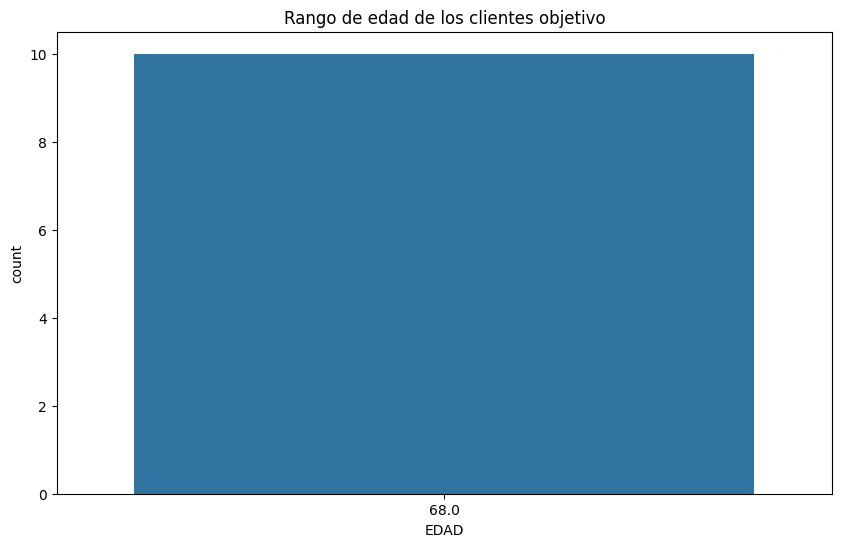

In [12]:
modelo()